In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()


In [3]:
irisdf = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


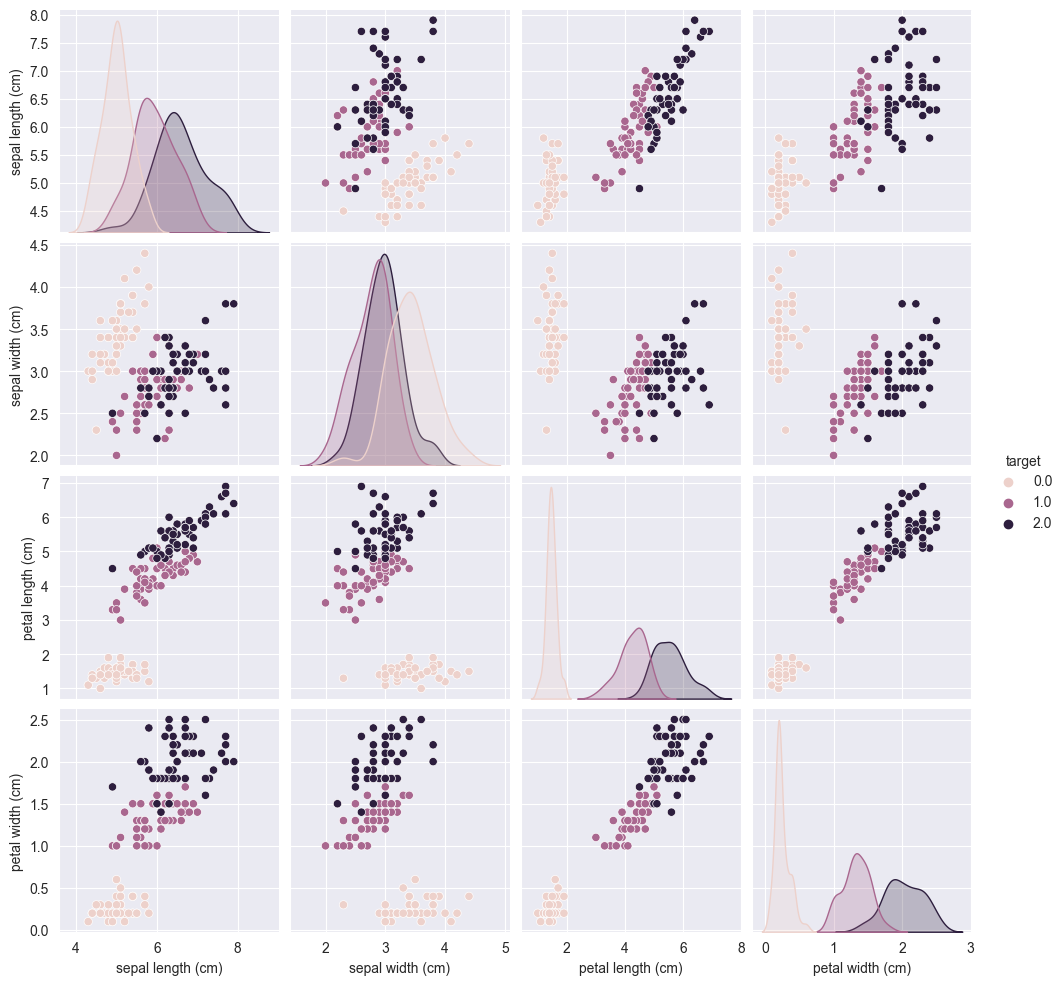

In [4]:
sns.pairplot(irisdf, hue='target')

In [5]:
petalsdf = irisdf[irisdf.target !=2][['petal length (cm)', 'petal width (cm)']]
display(petalsdf)
y = irisdf[irisdf.target !=2].target

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
95,4.2,1.2
96,4.2,1.3
97,4.3,1.3
98,3.0,1.1


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

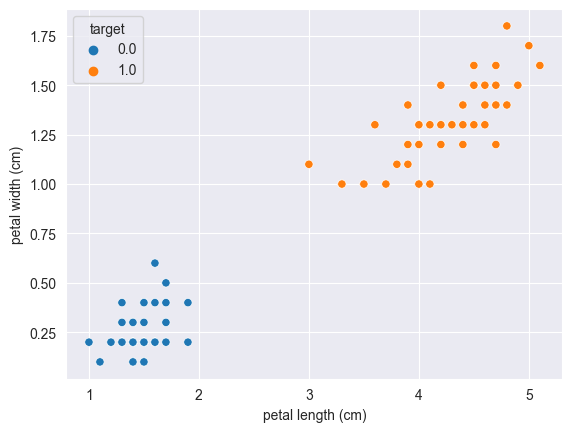

In [6]:
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

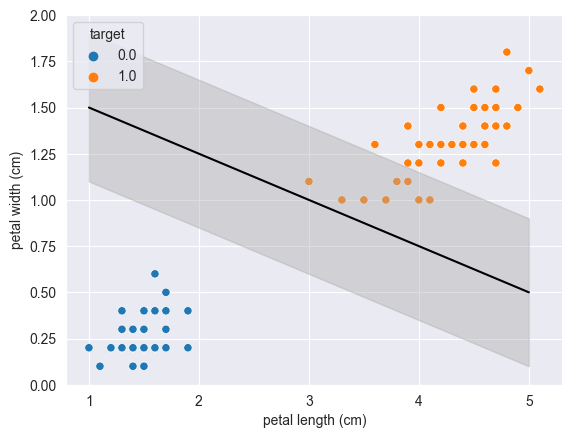

In [9]:
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)
xfit = np.linspace(1, 5)
for m, b, d in [(-0.25, 1.75, 0.4)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.ylim(0, 2);

The problem above is we overlap with data, so we at least need to find a line and margin that doesn't overlap the data and instead touches on the boundaries of the points

### [SVM Linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [11]:
# import our svm libraries
from sklearn.svm import SVC

In [12]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
yhat = svm.predict(X_test)

### import and print [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
#### [Display Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

[[15  0]
 [ 0 15]]


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


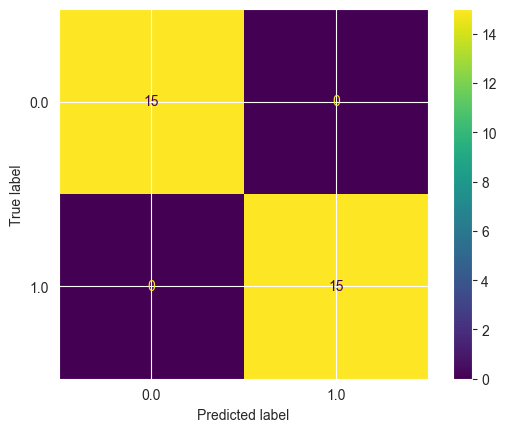

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
print(confusion_matrix(y_test, yhat))
plot_confusion_matrix(svm, X_test, y_test)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


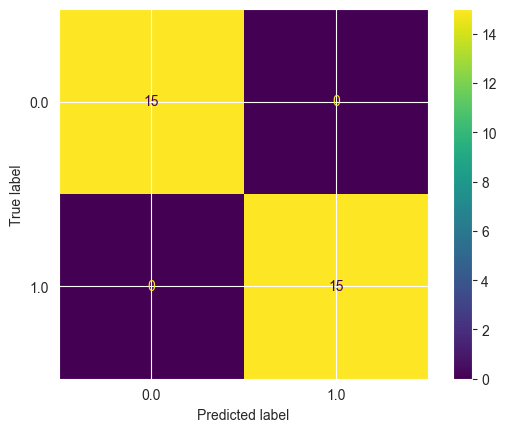

In [14]:
plot_confusion_matrix(svm, X_test, y_test)

#### Print [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Print [classification score](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score)

In [16]:
svm.score(X_test,y_test)

1.0

#### Create a [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) using meshteps of 0.02 of our SVM

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

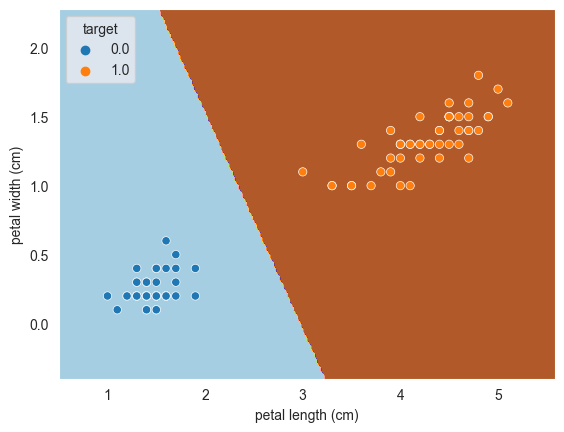

In [17]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

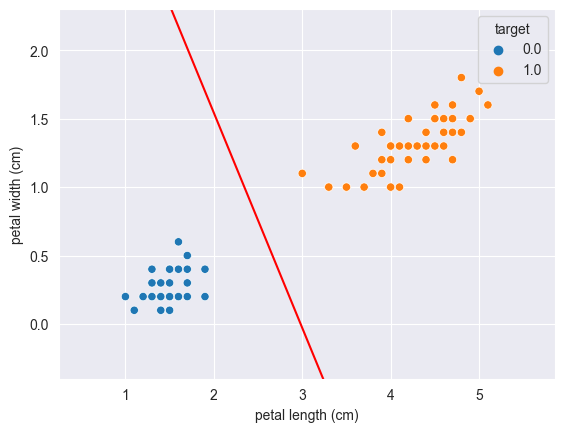

In [18]:
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

# Constructing a hyperplane using a formula.
# w consists of 2 elements
w = svm.coef_[0]
# b consists of 1 element
b = svm.intercept_[0]
# generating x-points from -1 to 1
x_points = np.linspace(plotx_min, plotx_max)
# getting corresponding y-points and plotting a red hyperplane
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.plot(x_points, y_points, c='r');
plt.ylim(ploty_min, ploty_max);

[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


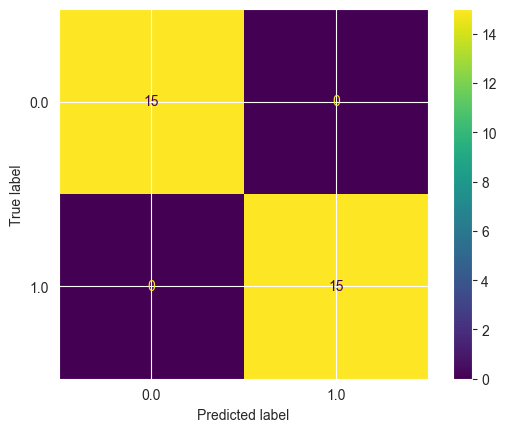

In [19]:
svmpoly = SVC(kernel='poly')
svmpoly.fit(X_train,y_train)
yhatpoly = svm.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svm.score(X_test,y_test))
plot_confusion_matrix(svmpoly, X_test, y_test)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

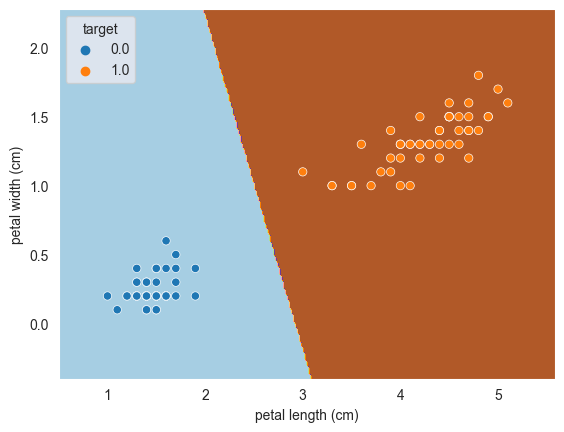

In [20]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

In [21]:
petalsdf = irisdf[['petal length (cm)', 'petal width (cm)']]
display(petalsdf)
y = irisdf.target
display(y)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

[[18  0  0]
 [ 0 12  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      0.92      0.96        13
         2.0       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

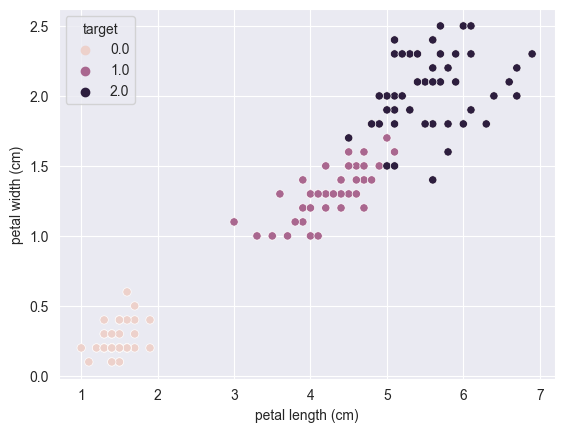

In [22]:
X_train, X_test, y_train, y_test = train_test_split(petalsdf, y, test_size=0.30)
svmpoly = SVC(kernel = 'poly', degree = 4)
svmpoly.fit(X_train,y_train)
yhatpoly = svmpoly.predict(X_test)
print(confusion_matrix(y_test, yhatpoly))
print(classification_report(y_test, yhatpoly))
print(svmpoly.score(X_test,y_test))
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)


c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


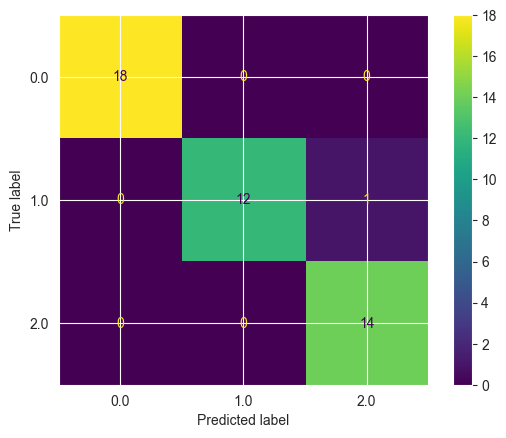

In [23]:
plot_confusion_matrix(svmpoly, X_test, y_test)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

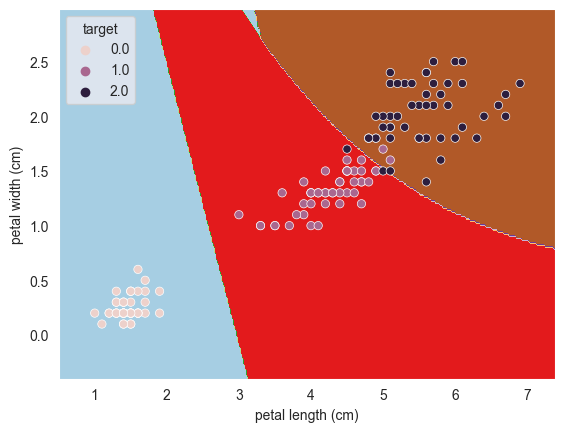

In [24]:
meshstep = .02
plotx_min, plotx_max = petalsdf['petal length (cm)'].min()-0.5, petalsdf['petal length (cm)'].max()+0.5
ploty_min, ploty_max = petalsdf['petal width (cm)'].min()-0.5, petalsdf['petal width (cm)'].max()+0.5
xx, yy = np.meshgrid(np.arange(plotx_min, plotx_max, meshstep),
                     np.arange(ploty_min, ploty_max, meshstep))
Z = svmpoly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.set_cmap(plt.cm.Paired)
plt.contourf(xx, yy, Z)
plt.axis('tight')
sns.scatterplot(data = petalsdf, x = 'petal length (cm)', y = 'petal width (cm)', hue = y)

c:\users\gerri\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


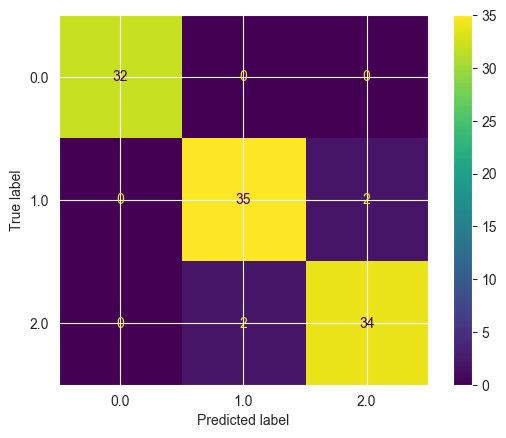

In [25]:
plot_confusion_matrix(svmpoly, X_train, y_train)

### Create a new feature based on X**2
#### create a [matplotlib 3d plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

Text(0.5, 0, 'petal data squared')

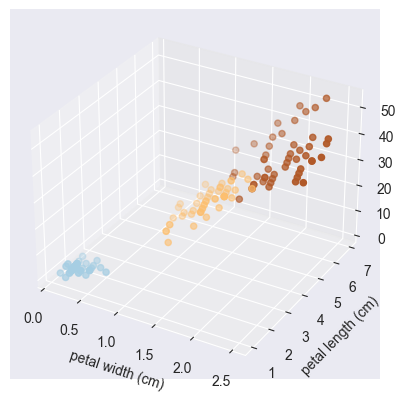

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ydata = petalsdf['petal length (cm)']
xdata = petalsdf['petal width (cm)']
zdata = (petalsdf**2).sum(1)
#zdata = np.exp(-(petalsdf**2).sum(1))
ax.scatter3D(xdata, ydata, zdata, c=y)
ax.set_xlabel('petal width (cm)')
ax.set_ylabel('petal length (cm)')
ax.set_zlabel('petal data squared')